In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
### Changing DIR to data location

os.chdir(r".\Sales_Data")

In [15]:
### IMPORTING ALL DATA (one by one to have the df in order month by month)

jan = pd.read_csv("Sales_January_2019.csv")
feb = pd.read_csv("Sales_February_2019.csv")
mar = pd.read_csv("Sales_March_2019.csv")
may = pd.read_csv("Sales_May_2019.csv")
apr = pd.read_csv("Sales_April_2019.csv")
jun = pd.read_csv("Sales_June_2019.csv")
jul = pd.read_csv("Sales_July_2019.csv")
aug = pd.read_csv("Sales_August_2019.csv")
sep = pd.read_csv("Sales_September_2019.csv")
oct = pd.read_csv("Sales_October_2019.csv")
nov = pd.read_csv("Sales_November_2019.csv")
dec = pd.read_csv("Sales_December_2019.csv") 

In [16]:
### CREATING FULL DATAFRAME WITH ALL DATA

pdlist = [jan,feb,mar,apr,may, jun, jul, aug, sep, oct, nov, dec]
df = pd.concat(pdlist)

In [17]:
df.tail(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
25107,319661,AAA Batteries (4-pack),1,2.99,12/11/19 21:24,"691 West St, Portland, ME 04101"
25108,319662,Bose SoundSport Headphones,1,99.99,12/31/19 19:07,"939 8th St, San Francisco, CA 94016"
25109,319663,Flatscreen TV,1,300,12/07/19 08:25,"334 12th St, Atlanta, GA 30301"
25110,319664,ThinkPad Laptop,1,999.99,12/30/19 01:06,"767 2nd St, San Francisco, CA 94016"
25111,319665,iPhone,1,700,12/15/19 11:13,"377 1st St, Atlanta, GA 30301"
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


In [18]:
### EXTRACTING MONTH COLUMN
 
df['Month'] = df['Order Date'].str[:2]

### DROPPING ALL NA (about 500 rows that all were without any data at all)

df = df.dropna()

### DROPPING ROWS WHICH WERE JUST DUPLICATED COLUMN NAMES

df = df[df['Month'] != 'Or']

df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [19]:
### CHANGING DATE OBJECT TO TIMESTAMP

df['Order Date'] = pd.to_datetime(df['Order Date'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12


In [20]:
### EXTRACT CITY FROM PURCHASE ADRESS

df_city_names = df['Purchase Address'].str.split(',').str[1]
df['City'] = df_city_names.str.strip()
df['City'].unique()

array(['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin',
       'Atlanta', 'Seattle', 'New York City', 'Dallas'], dtype=object)

In [21]:
### EXTRACT STATE

df_states = df['Purchase Address'].str.split(',').str[2].str[:3]
df['State'] = df_states.str.strip()



In [22]:
### SEE WHETHER THE CITIES ARE UNIQUE TO A STATE OR NOT

df.groupby(by='City')['State'].unique() 

City
Atlanta              [GA]
Austin               [TX]
Boston               [MA]
Dallas               [TX]
Los Angeles          [CA]
New York City        [NY]
Portland         [OR, ME]
San Francisco        [CA]
Seattle              [WA]
Name: State, dtype: object

In [23]:
### BECAUSE THERE'S TWO PORTLANDS IN THE DF, I ADDED THE STATE ADRESSES TO THEIR NAMES TO DIFFERENTIATE BETWEEN THE TWO

df['City'] = np.where(df['City'] == 'Portland', "Portland, " + df['State'] , df['City'])

In [24]:
### CREATING SALES PER ORDER COLUMN

df["Price Each"] = df['Price Each'].astype('float')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,MA,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,"Portland, OR",OR,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,CA,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,CA,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,TX,11.99


In [25]:
### QUESTION:  Which month has had the most sales? HOW MUCH WAS EARNED?
### DECEMBER WITH 4613443.34

df = df.reset_index(drop=True)
sales_per_month = df.groupby(by='Month').sum()
sales_per_month.reset_index(inplace=True)
sales_per_month.rename(columns = {'index': 'Month'})




,Month,Quantity Ordered,Price Each,Sales
0,01,10903,1811768.38,1822256.73
1,02,13449,2188884.72,2202022.42
2,03,17005,2791207.83,2807100.38
3,04,20558,3367671.02,3390670.24
4,05,18667,3135125.13,3152606.75
5,06,15253,2562025.61,2577802.26
6,07,16072,2632539.56,2647775.76
7,08,13448,2230345.42,2244467.88
8,09,13109,2084992.09,2097560.13
9,10,22703,3715554.83,3736726.88


<AxesSubplot:xlabel='Month', ylabel='Sales'>

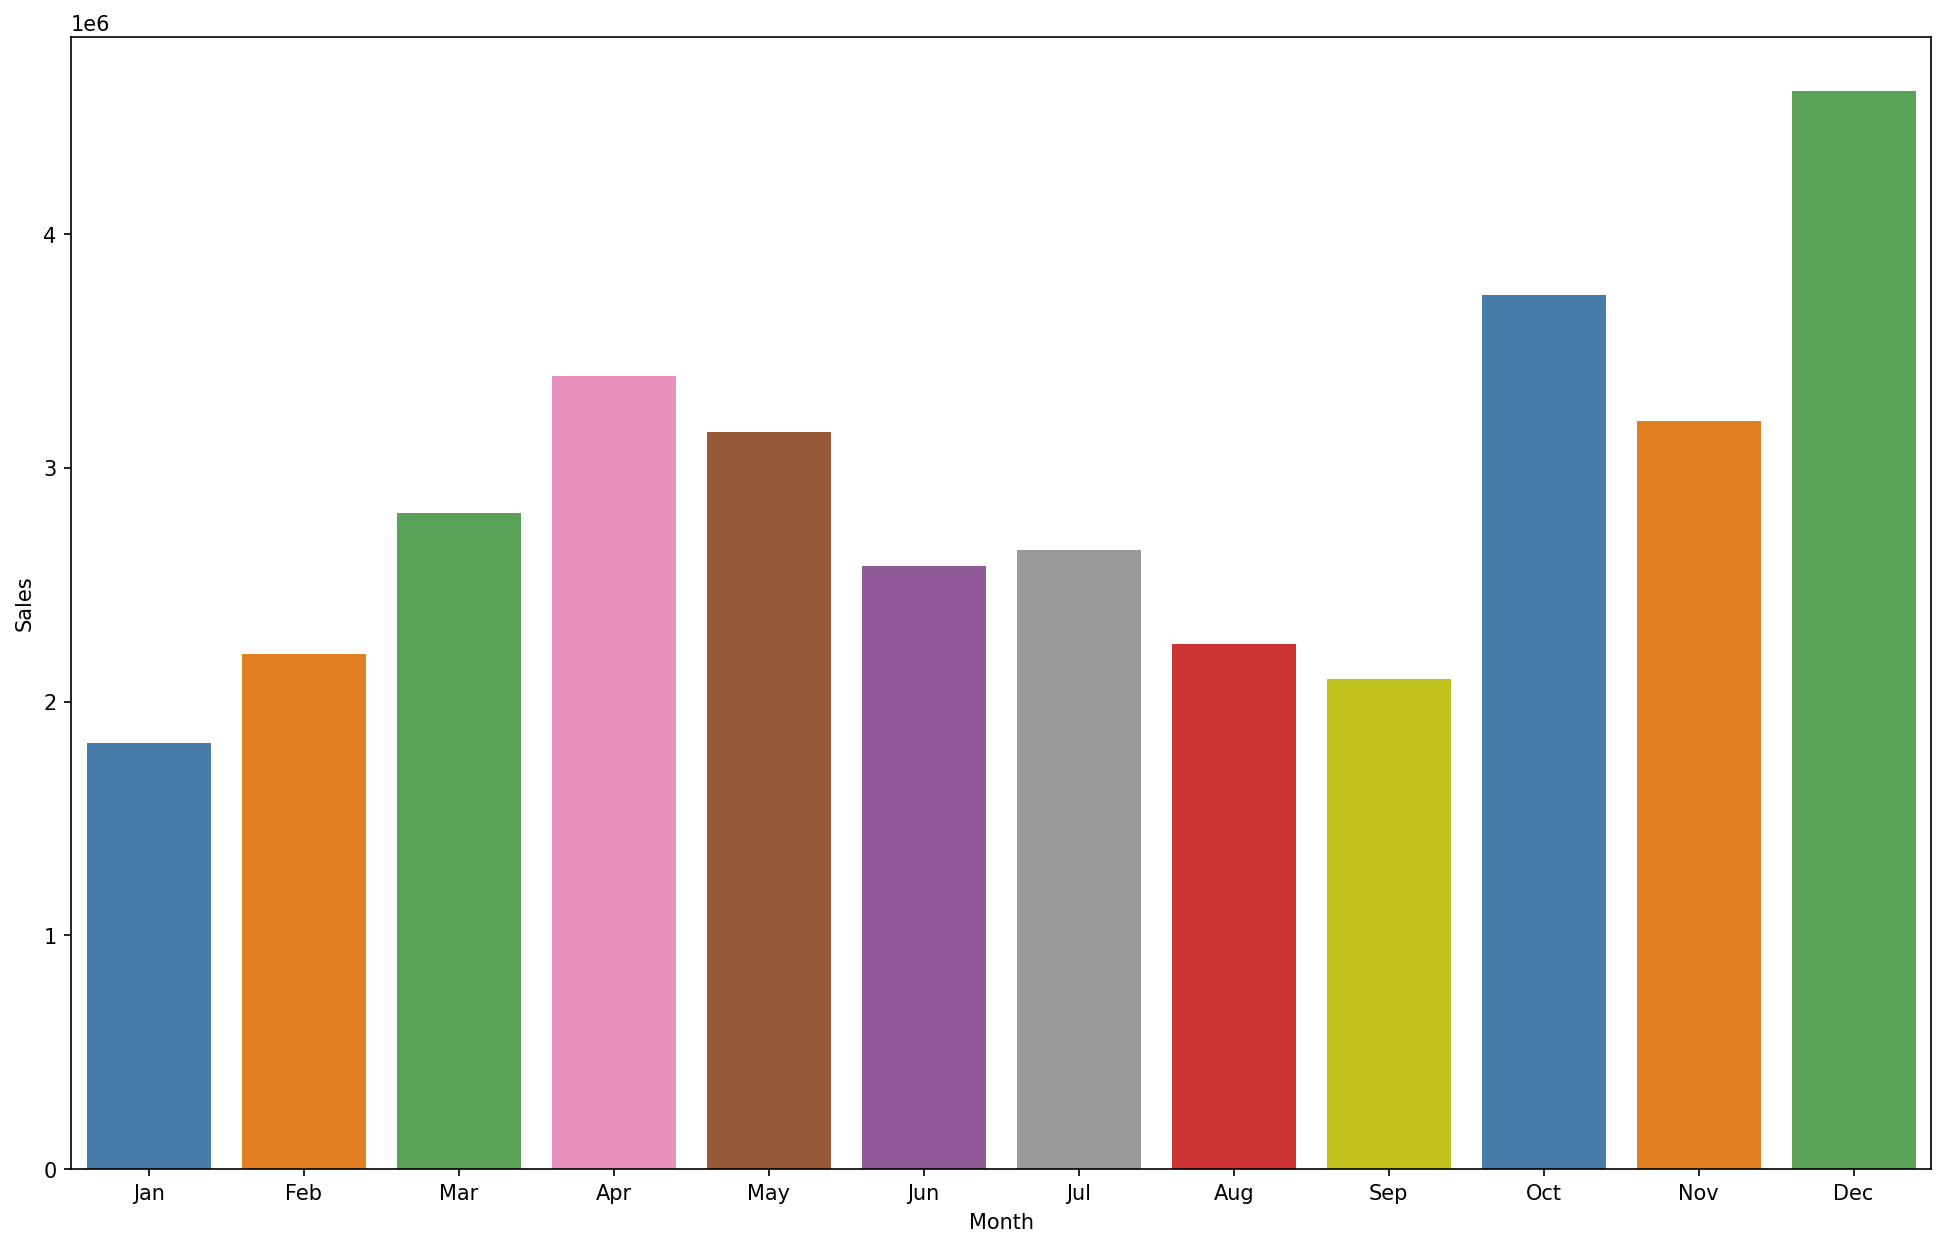

In [26]:
### PLOT SALES PER MONTH
sales_per_month['Month'] = sales_per_month['Month'].astype('int32')
import calendar
sales_per_month['Month'] = sales_per_month['Month'].apply(lambda x: calendar.month_abbr[x])

CB_colors = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
plt.figure(figsize=(16,10), dpi=150)
sns.barplot(data=sales_per_month, x='Month' ,y='Sales', palette=CB_colors)


<AxesSubplot:xlabel='City', ylabel='Sales'>

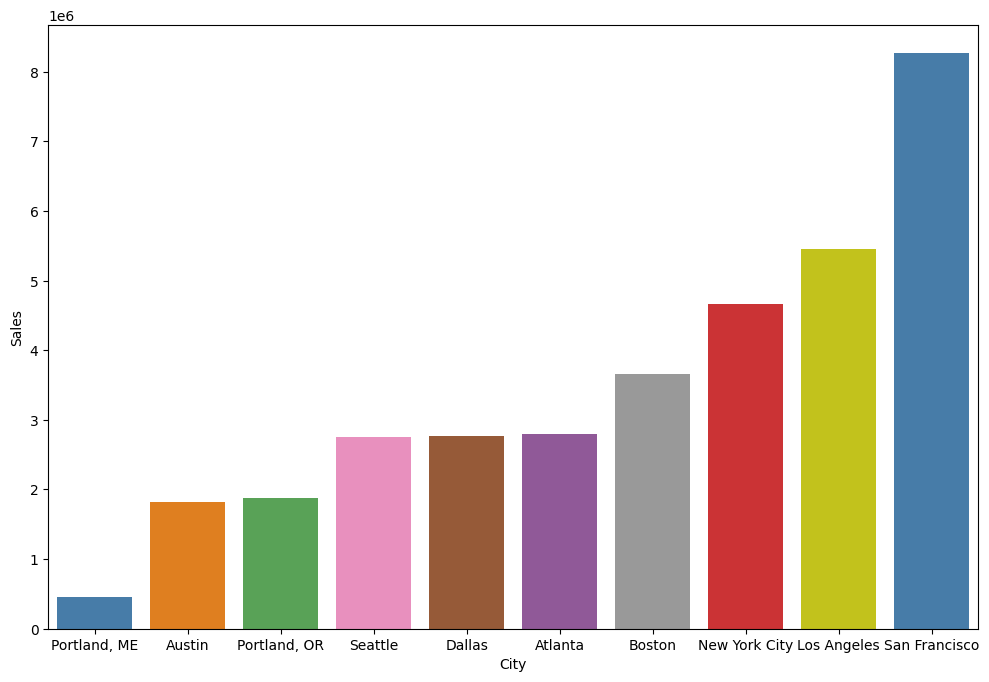

In [27]:
### QUESTION: WHICH CITY HAS THE MOST SALES

city_groups = df.groupby(by='City').sum()
city_groups.reset_index(inplace=True)
city_groups = city_groups.sort_values(by="Sales", ascending=True)

### PLOT SALES PER CITY

plt.figure(figsize=(12,8), dpi=100)
sns.barplot(data=city_groups, x='City' ,y='Sales', palette=CB_colors)

In [28]:
### QUESTION: WHICH PRODUCT HAS BEEN SELLING THE MOST:

product_sales = df.groupby(by='Product').sum()
product_sales.reset_index(inplace=True)


C:\Users\jakob\AppData\Local\Temp\ipykernel_19768\1454080403.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


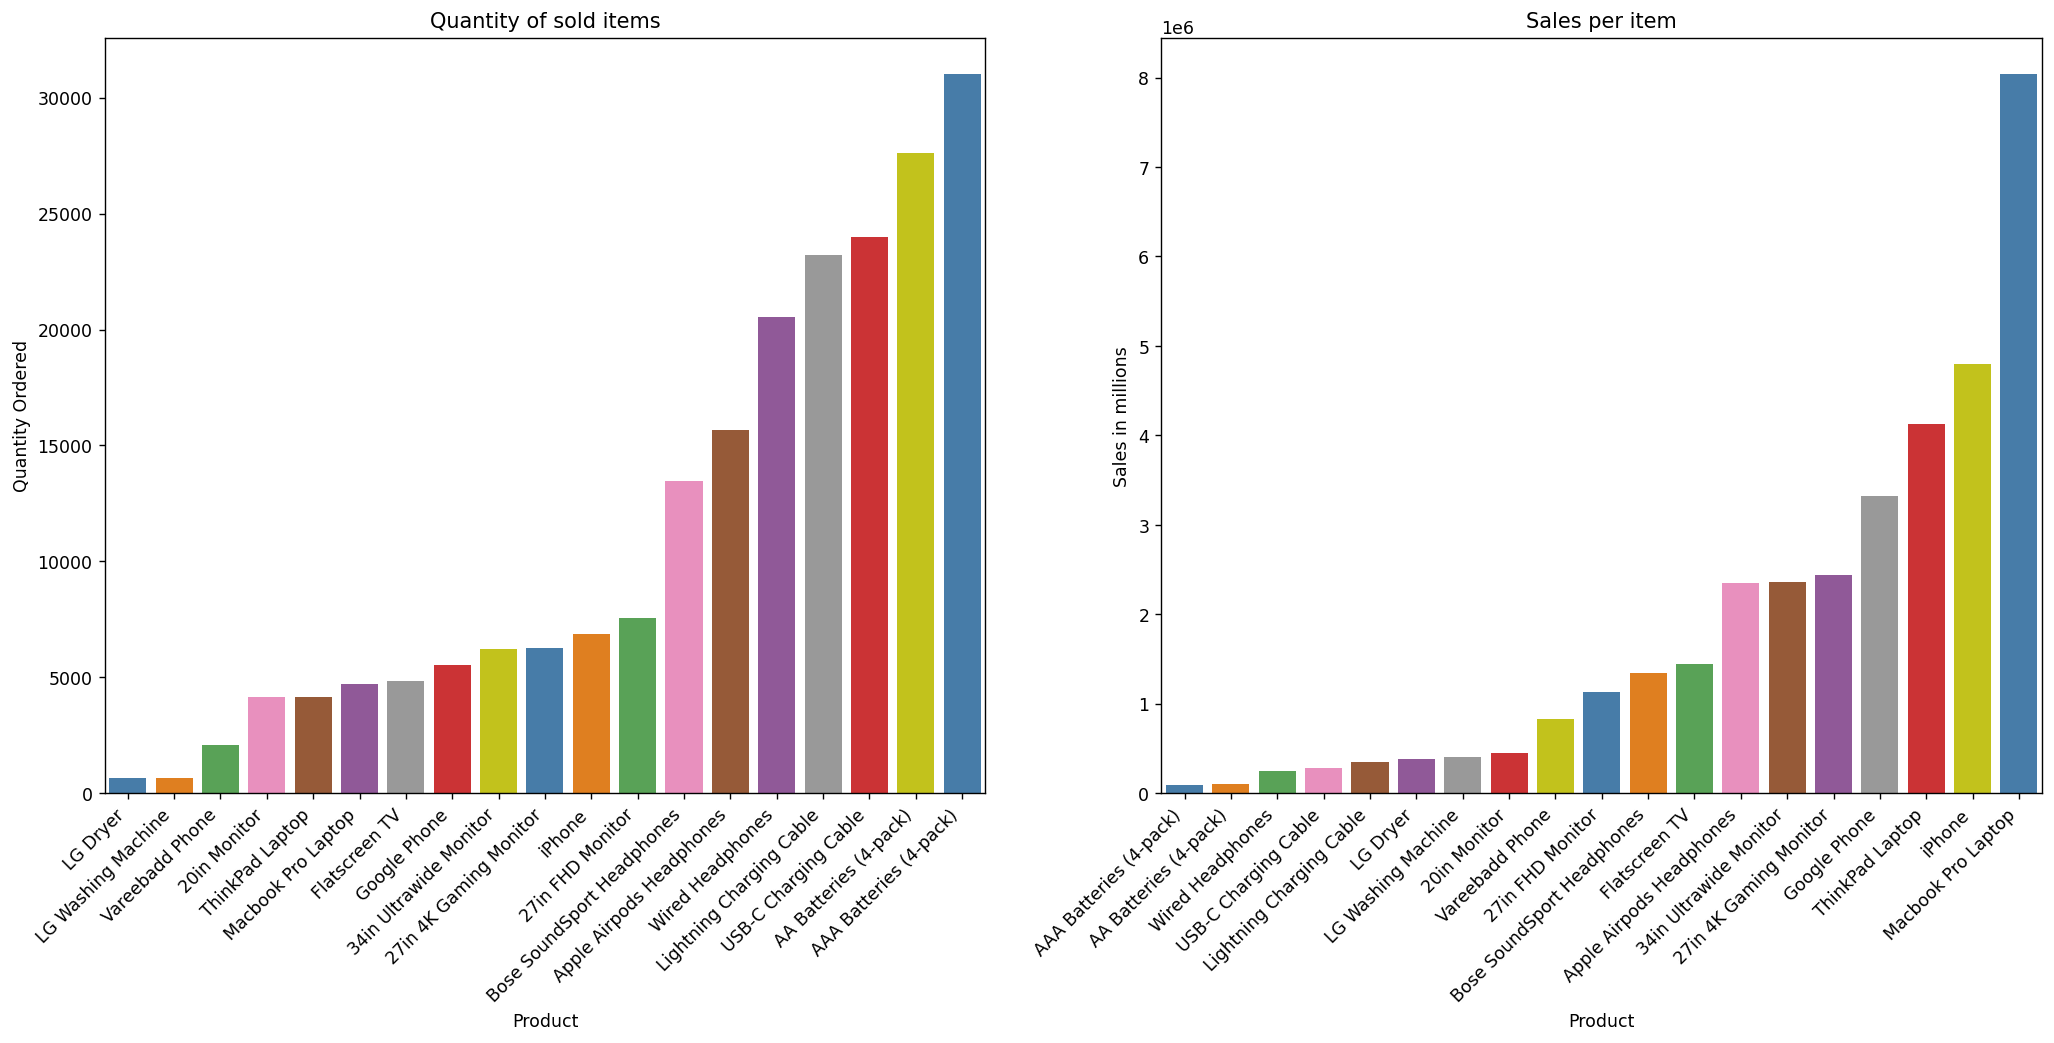

<Figure size 432x288 with 0 Axes>

In [29]:
### PLOTTING BOTH BY TOTAL QUANTITY AND BY TOTAL SALES

fig, axs = plt.subplots(ncols=2, figsize=(20,8))
fig.dpi = 125
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
axs[0].set_title('Quantity of sold items')
axs[1].set_title('Sales per item')

product_sales = product_sales.sort_values(by='Quantity Ordered')
sns.barplot(data=product_sales, x='Product', y='Quantity Ordered', palette=CB_colors, ax=axs[0])
product_sales = product_sales.sort_values(by='Sales')
sns.barplot(data=product_sales, x='Product', y='Sales', palette=CB_colors, ax=axs[1])
axs[1].set_ylabel('Sales in millions')
plt.show()
plt.tight_layout()


In [30]:
### AAA BATTERIES SELL THE HIGHEST QUANTITIES
### NACBOOK PRO HAS HAD THE HIGHEST SALES

df.to_csv('all_data.csv')
